In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical  # one-hot
from sklearn.model_selection import train_test_split

In [29]:
# 데이터 로드 및 전처리
(x_train, y_train),(x_test,y_test) =  cifar10.load_data()

In [30]:
# 레이블 one-hot 인코딩
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [31]:
# 데이터 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# 기본 CNN 모델을 정의
def create_model():
  model = models.Sequential([
      layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64,(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64,(3,3),activation='relu'),
      layers.Flatten(),
      layers.Dense(64,activation='relu'),
      layers.Dense(10,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [6]:
# 이미지 증대 안하고 훈련
x_train2,x_val,y_train2,y_val =  train_test_split(x_train,y_train,test_size=0.2,random_state=42)
model_widthout_gen = create_model()
hisory_widthout_gen = model_widthout_gen.fit(x_train2,y_train2,epochs=10, batch_size=64,
                                             validation_data=(x_val,y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3130 - loss: 1.8452 - val_accuracy: 0.4960 - val_loss: 1.4237
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5283 - loss: 1.3070 - val_accuracy: 0.5862 - val_loss: 1.1640
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6059 - loss: 1.1192 - val_accuracy: 0.6137 - val_loss: 1.0926
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6450 - loss: 1.0116 - val_accuracy: 0.6534 - val_loss: 0.9916
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6693 - loss: 0.9371 - val_accuracy: 0.6624 - val_loss: 0.9548
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6954 - loss: 0.8814 - val_accuracy: 0.6788 - val_loss: 0.9261
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7199 - loss: 0.8005 - val_accuracy: 0.6773 - val_loss: 0.9281
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7347 - loss: 0.7591 - val_accuracy: 

In [8]:
model_widthout_gen.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6986 - loss: 0.8828


[0.9002416133880615, 0.6934000253677368]

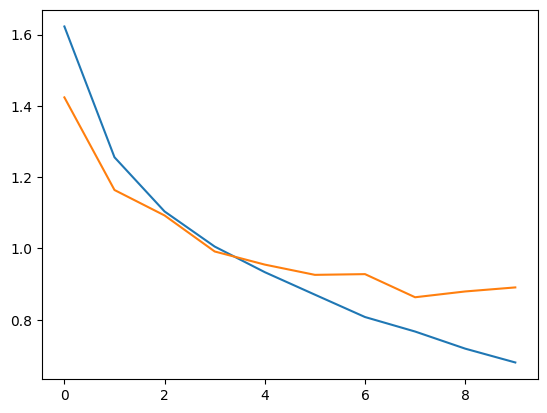

In [35]:
# hisory_widthout_gen 시각화
import matplotlib.pyplot as plt
plt.plot(hisory_widthout_gen.history['loss'],label='train_loss')
plt.plot(hisory_widthout_gen.history['val_loss'],label='val_loss')


이미지 증대

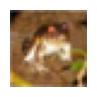

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

In [41]:
# 이미지 증대 설정
x_train2,x_val,y_train2,y_val =  train_test_split(x_train,y_train,test_size=0.2,random_state=42)
image_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
# 이미지 증대 데이터 생성
image_gen.fit(x_train2)
# 이미지 증대와 함께 훈련
model_with_gen = create_model()
history_with_gen = model_with_gen.fit(image_gen.flow(x_train2,y_train2,batch_size=64),
                                      epochs=10,validation_data=(x_val,y_val))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.2513 - loss: 1.9981 - val_accuracy: 0.4342 - val_loss: 1.5833
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.3997 - loss: 1.6217 - val_accuracy: 0.5163 - val_loss: 1.3442
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 49ms/step - accuracy: 0.4529 - loss: 1.5104 - val_accuracy: 0.5461 - val_loss: 1.2771
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.4901 - loss: 1.4178 - val_accuracy: 0.5088 - val_loss: 1.3674
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.5096 - loss: 1.3616 - val_accuracy: 0.5660 - val_loss: 1.2315
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.5328 - loss: 1.3134 - val_accuracy: 0.5843 - val_loss: 1.1612
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5421 - loss: 1.2808 - val_accuracy: 0.5952 - val_loss: 1.1228
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.5517 - loss: 1.2556 - val_accurac

In [ ]:
model_with_gen.evaluate(x_test,y_test)

In [ ]:
# hisory_widthout_gen 시각화
import matplotlib.pyplot as plt
plt.plot(history_with_gen.history['loss'],label='train_loss')
plt.plot(history_with_gen.history['val_loss'],label='val_loss')

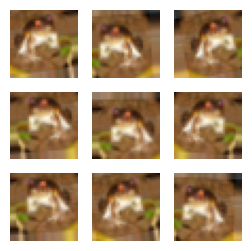

In [27]:
# 생성한 데이터 보기
sample = x_train[0]
sample = [ image_gen.random_transform(sample) for _ in range(9)]
plt.figure(figsize=(3,3))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(sample[i])
  plt.axis('off')
plt.show()